In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import ptitprince as pt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

from dotenv import load_dotenv
import os
import glob
import json
from models.session import Session

## Load data

In [2]:
# directory management
pilot_name = "rn-iii-pilot-5"
to_save_plots = False
data_path = f"../../data/for_plots/{pilot_name}"

figures_path = f"../figures/{pilot_name}ALL"
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

scores_df = pd.read_csv(os.path.join(data_path,"scores.csv"),index_col=0)
trials_time = pd.read_csv(os.path.join(data_path,"trials_time.csv"))
sessions_time = pd.read_csv(os.path.join(data_path,"sessions_time.csv"))
post_survey_df = pd.read_csv(os.path.join(data_path,"post_survey_df.csv"),index_col=0)

## post-survey plots

In [34]:
post_survey_df

,sessionId,task_explanation,difficulty_rating,time_limit_sufficient,arrows_color,additional_comments,expName
Unnamed: 0,,,,,,,
0,649d8d61d98de2a0b3c50195,5,4,3,2,NaN,rn-iii-pilot-5A
1,649d8d61d98de2a0b3c50196,3,4,1,1,NaN,rn-iii-pilot-5A
2,649d8d61d98de2a0b3c50197,4,2,3,2,NaN,rn-iii-pilot-5A
3,649d8d61d98de2a0b3c50198,2,3,2,3,NaN,rn-iii-pilot-5A
4,649d8d61d98de2a0b3c50199,4,3,5,1,NaN,rn-iii-pilot-5A
5,649d8d61d98de2a0b3c5019a,5,4,2,3,NaN,rn-iii-pilot-5A
6,649d8d61d98de2a0b3c5019b,4,2,4,3,NaN,rn-iii-pilot-5A
7,649d8d61d98de2a0b3c5019c,2,3,2,1,NaN,rn-iii-pilot-5A
8,649d8d61d98de2a0b3c5019d,5,4,1,5,NaN,rn-iii-pilot-5A


In [35]:
post_survey_df = post_survey_df[~post_survey_df['sessionId'].isin(["647731a58664fd383a5bfc1a"])]
post_survey_df.groupby(by=['expName']).size()

expName
rn-iii-pilot-5A    10
rn-iii-pilot-5B    10
rn-iii-pilot-5C    10
dtype: int64

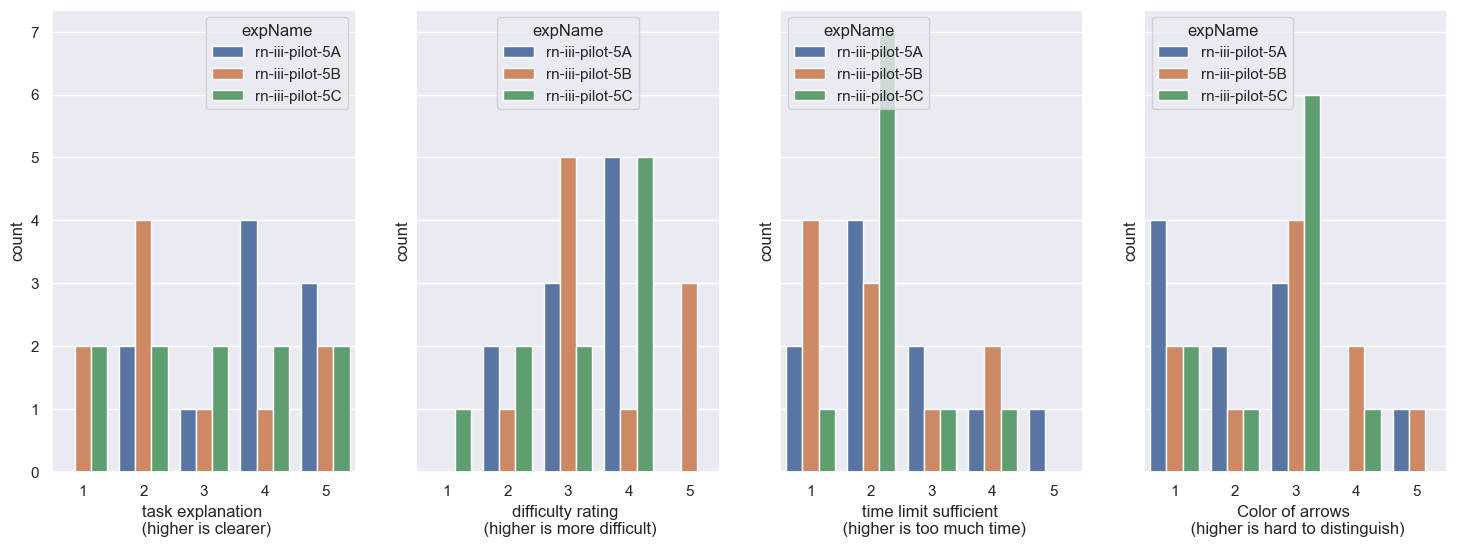

In [36]:
variables = ['task_explanation', 'difficulty_rating', 'time_limit_sufficient', 'arrows_color']
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, len(variables), sharey=True, figsize=(18, 6))

sns.countplot(data=post_survey_df, x="task_explanation", hue="expName", ax=ax1)
ax1.set_xlabel('task explanation \n (higher is clearer)')
sns.countplot(data=post_survey_df, x="difficulty_rating", hue="expName", ax=ax2)
ax2.set_xlabel('difficulty rating \n (higher is more difficult)')
sns.countplot(data=post_survey_df, x="time_limit_sufficient", hue="expName", ax=ax3)
ax3.set_xlabel('time limit sufficient \n (higher is too much time)')
sns.countplot(data=post_survey_df, x="arrows_color", hue="expName", ax=ax4)
ax4.set_xlabel('Color of arrows \n (higher is hard to distinguish)')


f.savefig(os.path.join(figures_path, 'post_survey.pdf'), format='pdf', dpi=300)
f.savefig(os.path.join(figures_path, 'post_survey.png'), format='png', dpi=300)

## Score analysis

In [37]:
scores_df

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score
0,647731a58664fd383a5bfc0f,True,rn-iii-pilot-5b,0,NaN,try_yourself,NaN,NaN,NaN,NaN,NaN
1,647731a58664fd383a5bfc0f,True,rn-iii-pilot-5b,0,0.0,individual,494f81180d20e6e3833458bc9e3650a4,950.0,4.0,400.0,950.0
2,647731a58664fd383a5bfc0f,True,rn-iii-pilot-5b,0,1.0,individual,fd96e4d30861ce81eac2b1500da110fd,1050.0,4.0,300.0,1050.0
3,647731a58664fd383a5bfc0f,True,rn-iii-pilot-5b,0,2.0,individual,952e931bb61a5b5dacf6562363b91260,1450.0,4.0,600.0,1450.0
4,647731a58664fd383a5bfc0f,True,rn-iii-pilot-5b,0,3.0,individual,4bab7793667a3302e33d0987aa8d9f8b,1250.0,4.0,800.0,1250.0
...,...,...,...,...,...,...,...,...,...,...,...
650,649d8d61d98de2a0b3c5019f,False,rn-iii-pilot-5a,0,14.0,individual,538e9217ea384e0c26f2c0ae69be290e,1250.0,4.0,800.0,1050.0
651,649d8d61d98de2a0b3c5019f,False,rn-iii-pilot-5a,0,15.0,individual,b97544f690e26a1247ee2b037bf459ea,750.0,4.0,300.0,850.0
652,649d8d61d98de2a0b3c5019f,False,rn-iii-pilot-5a,0,16.0,individual,073ef90b1b499af3964efda6fd18b510,1450.0,4.0,500.0,1250.0
653,649d8d61d98de2a0b3c5019f,False,rn-iii-pilot-5a,0,17.0,individual,2f53e03d5cef9262445be77e7f2d78ad,1250.0,4.0,0.0,1250.0


In [38]:
scores_df.replace({"isAI": {True: 'AI', False: 'Human'}}, inplace=True)
scores_df.groupby(by=["expName","trialType","isAI"]).size()

expName          trialType      isAI 
rn-iii-pilot-5a  demonstration  Human     10
                 individual     Human    140
                 try_yourself   Human     10
rn-iii-pilot-5b  demonstration  AI        40
                                Human     11
                 individual     AI        40
                                Human     66
                 try_yourself   AI        10
                                Human     88
rn-iii-pilot-5c  demonstration  AI        40
                                Human     10
                 individual     AI        40
                                Human     60
                 try_yourself   AI        10
                                Human     80
dtype: int64

In [39]:
scores_df[~scores_df['trialIdx'].isna()].groupby(by=["expName","trialType","isAI"]).size()

expName          trialType      isAI 
rn-iii-pilot-5a  individual     Human    140
rn-iii-pilot-5b  demonstration  AI        40
                 individual     AI        40
                                Human     66
                 try_yourself   Human     88
rn-iii-pilot-5c  demonstration  AI        40
                 individual     AI        40
                                Human     60
                 try_yourself   Human     80
dtype: int64

In [40]:
# remove session in 5B that was recorded twice by mistake!!
scores_df = scores_df[~scores_df['sessionId'].isin(["647731a58664fd383a5bfc1a"])]
scores_df.groupby(by=["expName","trialType","isAI"]).size()

expName          trialType      isAI 
rn-iii-pilot-5a  demonstration  Human     10
                 individual     Human    140
                 try_yourself   Human     10
rn-iii-pilot-5b  demonstration  AI        40
                                Human     10
                 individual     AI        40
                                Human     60
                 try_yourself   AI        10
                                Human     80
rn-iii-pilot-5c  demonstration  AI        40
                                Human     10
                 individual     AI        40
                                Human     60
                 try_yourself   AI        10
                                Human     80
dtype: int64

# make plot hue

In [41]:
scores_dfA_human = scores_df[(scores_df['isAI']=='Human') & (scores_df['expName']=='rn-iii-pilot-5a') & (scores_df['trialType']=='individual')]

scores_dfB_ai = scores_df[(scores_df['isAI']=='AI') & (scores_df['expName']=='rn-iii-pilot-5b')]
scores_dfB_human = scores_df[(scores_df['isAI']=='Human') & (scores_df['expName']=='rn-iii-pilot-5b')]

scores_dfC_ai = scores_df[(scores_df['isAI']=='AI') & (scores_df['expName']=='rn-iii-pilot-5c')]
scores_dfC_human = scores_df[(scores_df['isAI']=='Human') & (scores_df['expName']=='rn-iii-pilot-5c')]

scores_dfB_human.loc[scores_dfB_human['trialIdx'].isin([10,13,16,19]), 'trialType'] = 'try_yourself_before'
scores_dfB_human.loc[scores_dfB_human['trialIdx'].isin([12,15,18,21]), 'trialType'] = 'try_yourself_after'
scores_dfB_human.loc[scores_dfB_human['trialIdx'].isin([4,5]), 'trialType'] = 'individual_before'
scores_dfB_human.loc[scores_dfB_human['trialIdx'].isin([23,24,25,26]), 'trialType'] = 'individual_after'

scores_dfC_human.loc[scores_dfC_human['trialIdx'].isin([10,13,16,19]), 'trialType'] = 'try_yourself_before'
scores_dfC_human.loc[scores_dfC_human['trialIdx'].isin([12,15,18,21]), 'trialType'] = 'try_yourself_after'
scores_dfC_human.loc[scores_dfC_human['trialIdx'].isin([4,5]), 'trialType'] = 'individual_before'
scores_dfC_human.loc[scores_dfC_human['trialIdx'].isin([23,24,25,26]), 'trialType'] = 'individual_after'

# scores_df = pd.concat([scores_dfA_human,
#                        scores_dfB_ai,
#                        scores_dfB_human,
#                        scores_dfC_ai,
#                        scores_dfC_human])
#
# # create plot hue
# scores_df['plot_hue'] = scores_df['isAI'].astype(str) + ', ' + scores_df['trialType'].astype(str)

## fix the missing step penalty for 5B scores

In [42]:
moves = pd.read_csv(os.path.join(f"../../data/final/rn-iii-pilot-5b/moves.csv"),sep=',', index_col=0)
trial = pd.read_csv(os.path.join(f"../../data/final/rn-iii-pilot-5b/trial.csv"),sep=',', index_col=0)


human_session_ids = list(scores_df[(scores_df['isAI']=='Human') & (scores_df['expName']=='rn-iii-pilot-5b')]['sessionId'].unique())
moves_human = moves[moves['sessionId'].isin(human_session_ids)]
missings = moves_human.groupby(by=['sessionId','trialID']).agg(n_missings=('isMissing','sum')).reset_index()

print(f"{len(missings[missings['n_missings']>0])} out of {len(missings)} trials "
      f"({round(len(missings[missings['n_missings']>0]) / len(missings) *100,2)} %) have missing steps")

22 out of 140 trials (15.71 %) have missing steps


In [43]:
scoreB_updated = moves_human.groupby(by=['sessionId','trialID']).agg(score_true=("reward",'sum'),
                                                                     n_missings=('isMissing','sum')).reset_index()
scoreB_updated

,sessionId,trialID,score_true,n_missings
0,647731a58664fd383a5bfc19,4,700,0
1,647731a58664fd383a5bfc19,5,600,0
2,647731a58664fd383a5bfc19,10,400,0
3,647731a58664fd383a5bfc19,12,950,0
4,647731a58664fd383a5bfc19,13,50,1
...,...,...,...,...
135,64773d6f8664fd383a5bfc32,21,1250,0
136,64773d6f8664fd383a5bfc32,23,1250,0
137,64773d6f8664fd383a5bfc32,24,1250,0
138,64773d6f8664fd383a5bfc32,25,1650,0


In [44]:
scores_dfB_human[scores_dfB_human['sessionId']=='647731a58664fd383a5bfc19']

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score
90,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,10.0,try_yourself_before,949d93f06b9a159e993467fe9d6eec5a,400.0,1.0,500.0,1150.0
91,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,12.0,try_yourself_after,949d93f06b9a159e993467fe9d6eec5a,950.0,4.0,500.0,1150.0
92,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,13.0,try_yourself_before,13cca31d179666d20e50d055a4ecefb7,0.0,2.0,400.0,1250.0
93,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,15.0,try_yourself_after,13cca31d179666d20e50d055a4ecefb7,1450.0,4.0,400.0,1250.0
94,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,16.0,try_yourself_before,05f42eade1468cc6abd87196683cc94b,1050.0,4.0,600.0,1250.0
95,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,18.0,try_yourself_after,05f42eade1468cc6abd87196683cc94b,1250.0,4.0,600.0,1250.0
96,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,19.0,try_yourself_before,bdb44c717649461fc71058a0a17c78a3,650.0,1.0,700.0,1250.0
97,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,21.0,try_yourself_after,bdb44c717649461fc71058a0a17c78a3,1250.0,4.0,700.0,1250.0
98,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,4.0,individual_before,cf1b5d875744aee7aff66b414e956861,700.0,0.0,700.0,1250.0
99,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,5.0,individual_before,9afc39c096a3ff0e90eb2c646731216d,600.0,0.0,600.0,1450.0


In [45]:
scores_dfB_human_merged = pd.merge(scores_dfB_human,scoreB_updated,how='inner',left_on=['sessionId','trialIdx'],right_on=['sessionId','trialID'])
scores_dfB_human_merged

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,trialID,score_true,n_missings
0,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,10.0,try_yourself_before,949d93f06b9a159e993467fe9d6eec5a,400.0,1.0,500.0,1150.0,10,400,0
1,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,12.0,try_yourself_after,949d93f06b9a159e993467fe9d6eec5a,950.0,4.0,500.0,1150.0,12,950,0
2,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,13.0,try_yourself_before,13cca31d179666d20e50d055a4ecefb7,0.0,2.0,400.0,1250.0,13,50,1
3,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,15.0,try_yourself_after,13cca31d179666d20e50d055a4ecefb7,1450.0,4.0,400.0,1250.0,15,1450,0
4,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,16.0,try_yourself_before,05f42eade1468cc6abd87196683cc94b,1050.0,4.0,600.0,1250.0,16,1050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,5.0,individual_before,5d68c786da3fe4a4d5a0e5168b2496ab,400.0,1.0,600.0,1050.0,5,400,0
136,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual_after,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0,23,1250,0
137,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual_after,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0,24,1250,0
138,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual_after,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0,25,1650,0


In [46]:
scores_dfB_human_merged.rename(columns={'score':'score_old', 'score_true':'score'}, inplace=True)
scores_dfB_human_merged

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score_old,maxLevelReached,myopic_score,ai_score,trialID,score,n_missings
0,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,10.0,try_yourself_before,949d93f06b9a159e993467fe9d6eec5a,400.0,1.0,500.0,1150.0,10,400,0
1,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,12.0,try_yourself_after,949d93f06b9a159e993467fe9d6eec5a,950.0,4.0,500.0,1150.0,12,950,0
2,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,13.0,try_yourself_before,13cca31d179666d20e50d055a4ecefb7,0.0,2.0,400.0,1250.0,13,50,1
3,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,15.0,try_yourself_after,13cca31d179666d20e50d055a4ecefb7,1450.0,4.0,400.0,1250.0,15,1450,0
4,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,16.0,try_yourself_before,05f42eade1468cc6abd87196683cc94b,1050.0,4.0,600.0,1250.0,16,1050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,5.0,individual_before,5d68c786da3fe4a4d5a0e5168b2496ab,400.0,1.0,600.0,1050.0,5,400,0
136,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual_after,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0,23,1250,0
137,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual_after,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0,24,1250,0
138,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual_after,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0,25,1650,0


In [47]:
scores_dfC_human.columns

Index(['sessionId', 'isAI', 'expName', 'generation', 'trialIdx', 'trialType',
       'networkId', 'score', 'maxLevelReached', 'myopic_score', 'ai_score'],
      dtype='object')

## finalize into new scores_df dataframe to be used in plots

In [48]:
scores_df = pd.concat([scores_dfA_human,
                       scores_dfB_ai,
                       scores_dfB_human_merged[['sessionId', 'isAI', 'expName', 'generation', 'trialIdx', 'trialType','networkId', 'score', 'maxLevelReached', 'myopic_score', 'ai_score']],
                       scores_dfC_ai,
                       scores_dfC_human])

# create plot hue
scores_df['plot_hue'] = scores_df['isAI'].astype(str) + ', ' + scores_df['trialType'].astype(str)

In [49]:
scores_df

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue
496,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,4.0,individual,5ecb41db0bee1cd18e15ee53135ebb68,550.0,1.0,800.0,850.0,"Human, individual"
497,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,5.0,individual,024a2fa697f61362dd70f557c915a562,700.0,0.0,800.0,1050.0,"Human, individual"
498,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,6.0,individual,6d0ffbd4eb723034e88987aff40bb323,150.0,2.0,400.0,1250.0,"Human, individual"
499,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,7.0,individual,ef5de1c39533c2ba557db1756b3105ca,300.0,1.0,800.0,1250.0,"Human, individual"
500,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,8.0,individual,4d467829f913aedfe7abdaae2f092575,300.0,1.0,300.0,1250.0,"Human, individual"
...,...,...,...,...,...,...,...,...,...,...,...,...
490,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,23.0,individual_after,043e6946afedbdfe96a1b94b9c64bf63,650.0,4.0,300.0,1250.0,"Human, individual_after"
491,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,24.0,individual_after,e6bf4b808a028478dc72d88458701bae,-50.0,1.0,0.0,1650.0,"Human, individual_after"
492,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,25.0,individual_after,2eb7dea0d8ad18c567ab048a707597e1,1250.0,4.0,200.0,1250.0,"Human, individual_after"
493,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,26.0,individual_after,c4b3f18b9ced69da6d451dfab4c4b966,1250.0,4.0,500.0,1650.0,"Human, individual_after"


In [50]:
# remove NaN trials
scores_df =  scores_df[~scores_df['trialIdx'].isna()]

Text(0.5, 0.98, 'RN-III Pilot 5')

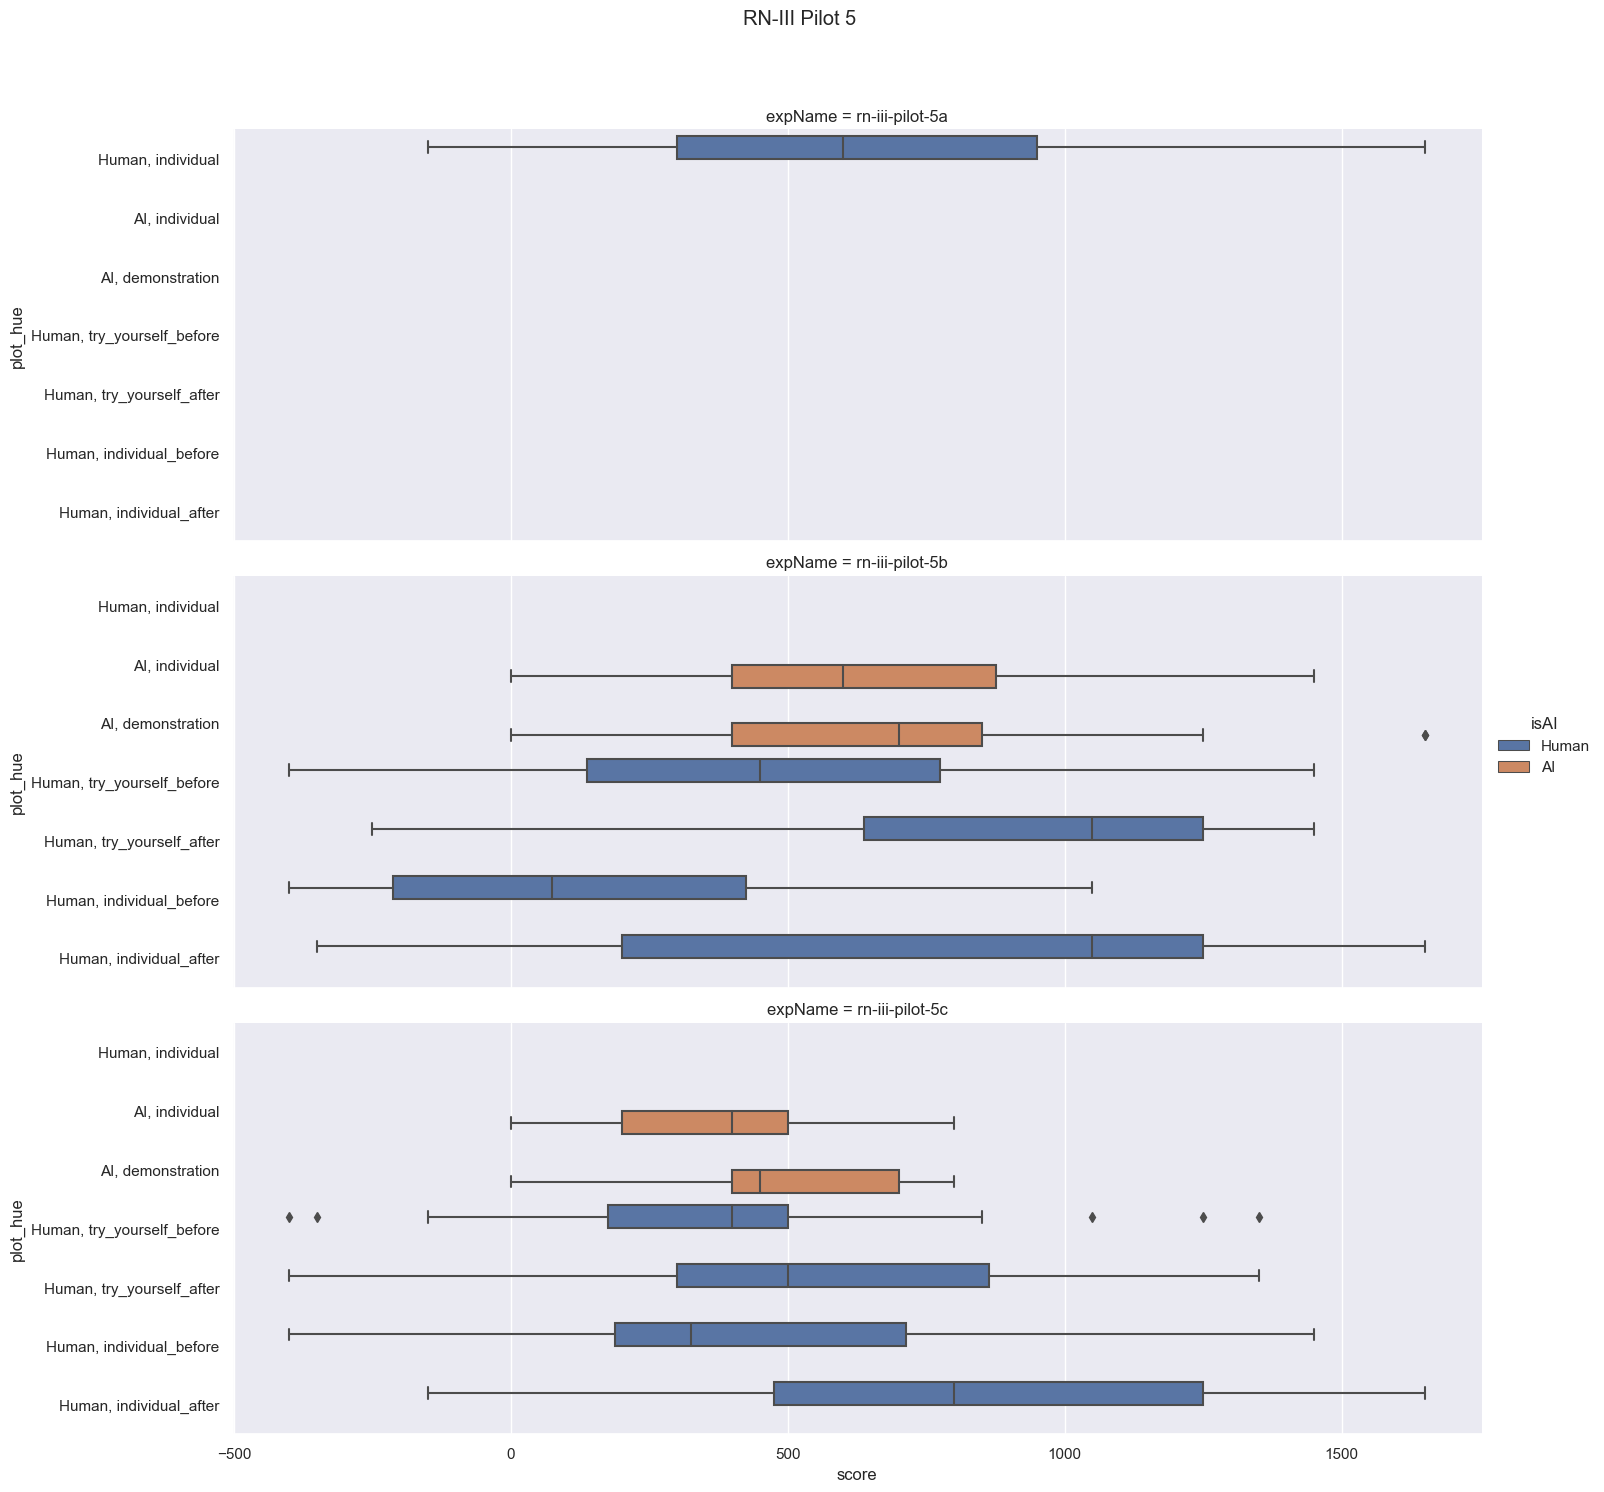

In [51]:
# TODO: adapt plot hue to fit pilot 5A
fig1 = sns.catplot(data=scores_df, x="score", y="plot_hue", hue='isAI', row='expName', kind="box", height=5, aspect=3)
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle('RN-III Pilot 5')

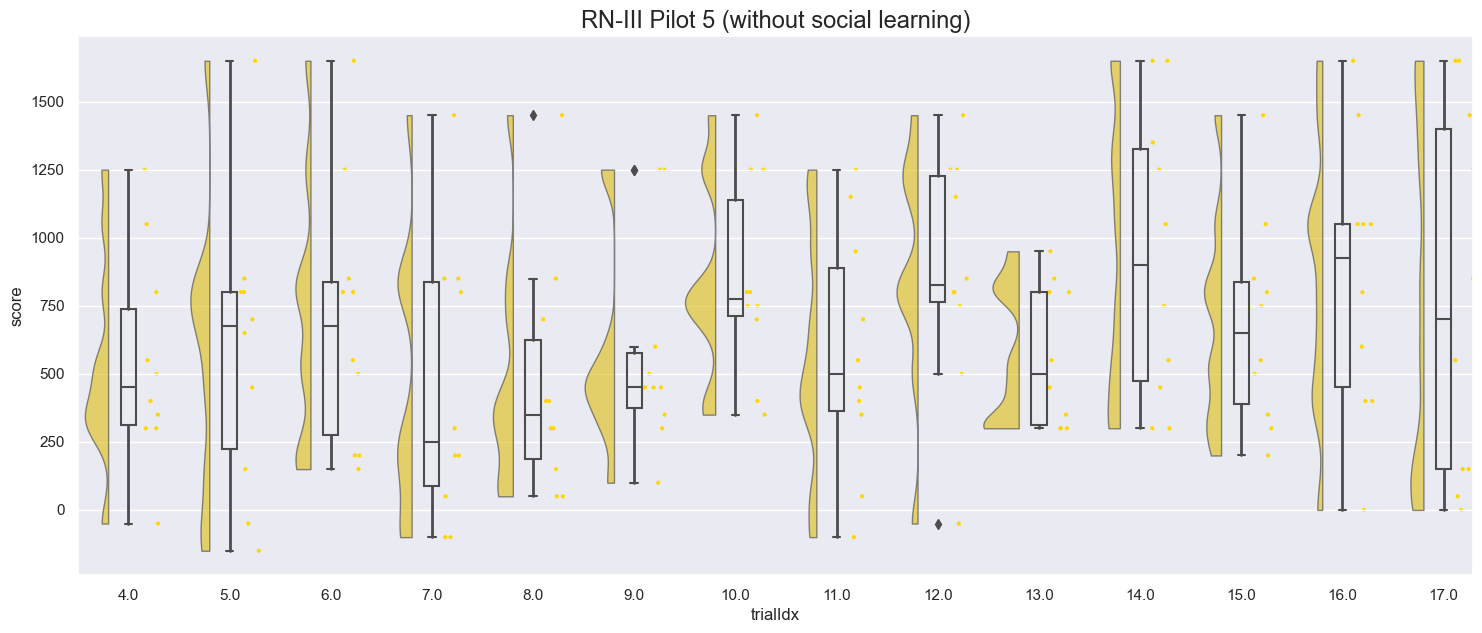

In [23]:
f, ax = plt.subplots(figsize=(18, 7))
pt.RainCloud(x = 'trialIdx',
             y = 'score',
             data = scores_df[(scores_df['isAI']=='Human') & (scores_df['expName'].isin(['rn-iii-pilot-5a']))],
             bw = .2,
             palette=['gold'],
             width_viol = .7,
             ax=ax,
             orient = 'v' ,
             alpha = .65,
             dodge = False,
             #pointplot = True,
             move = .2)

ax.set_title("RN-III Pilot 5 (without social learning)", fontsize=17)

f.savefig(os.path.join(figures_path, 'scores_5A.png'), format='png', dpi=300)

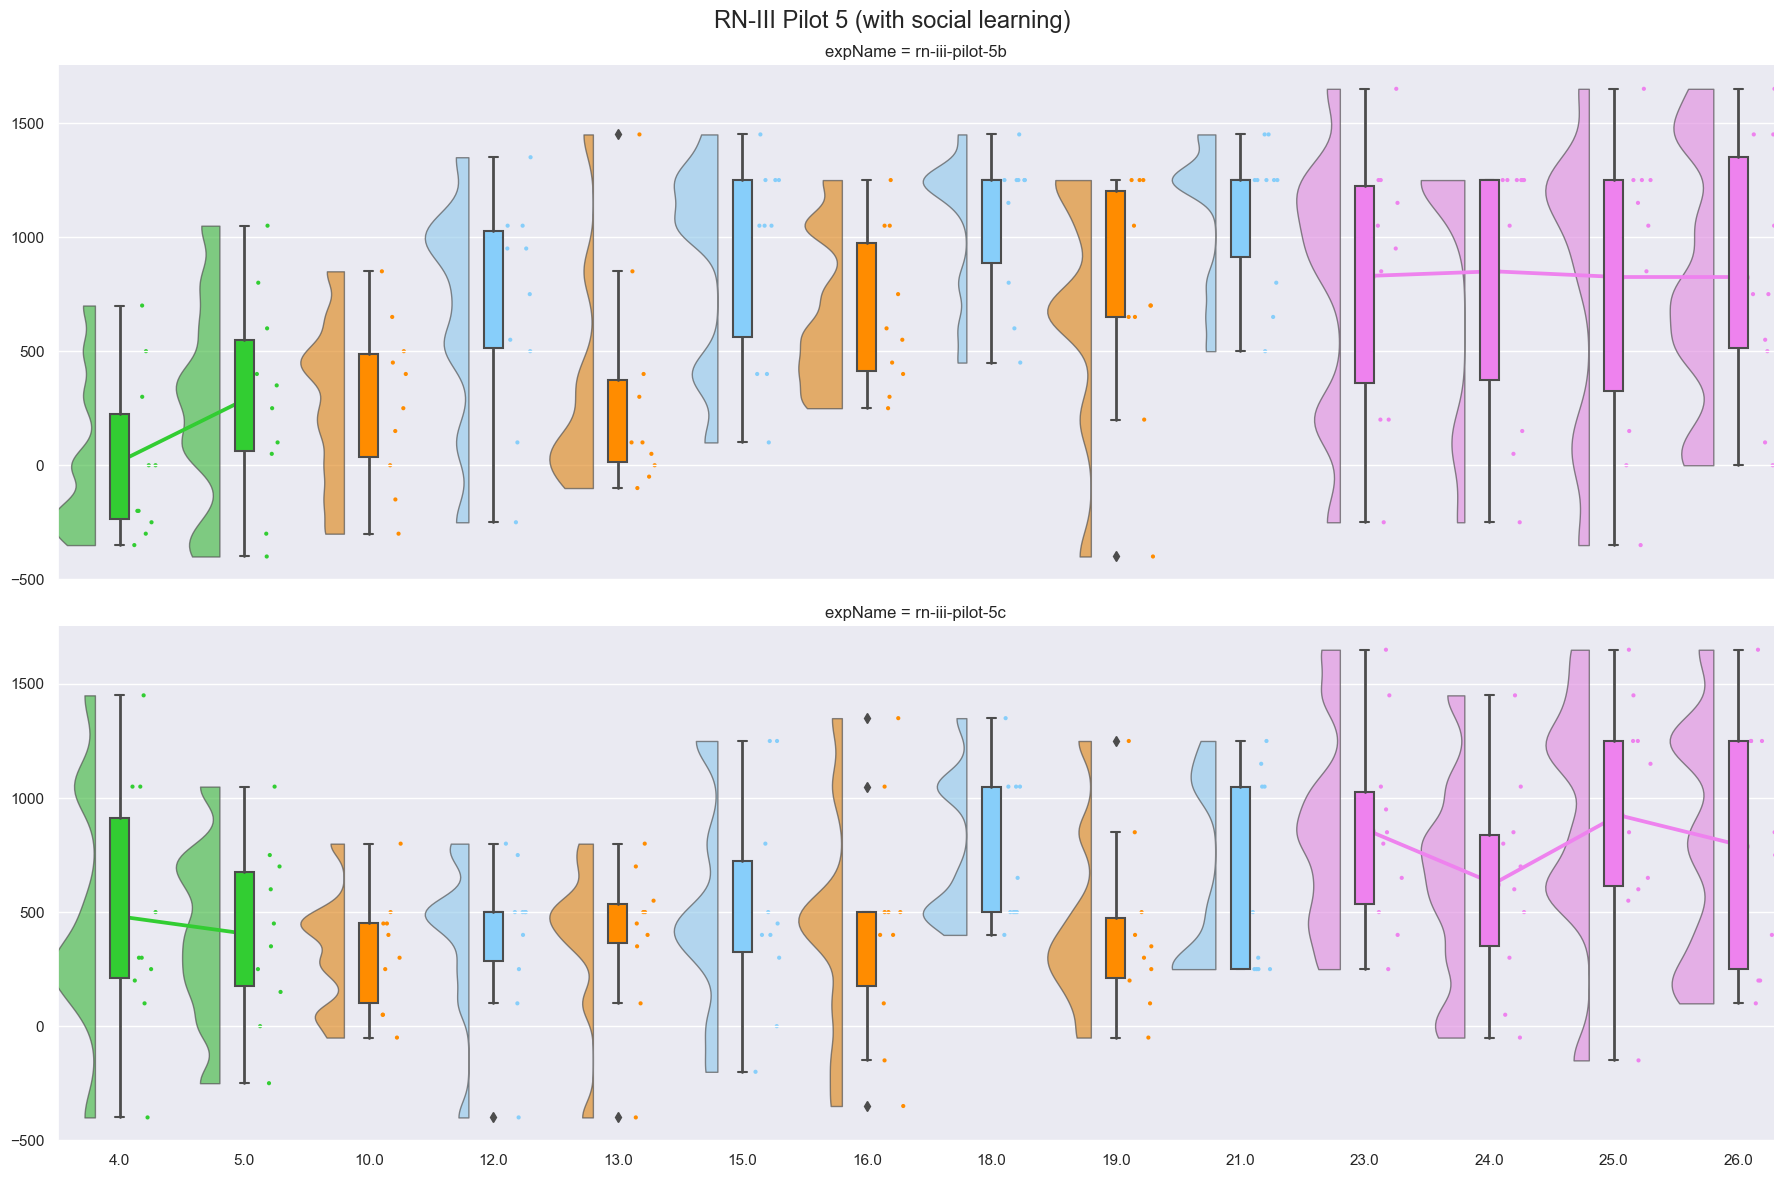

In [24]:
# scores_df[(scores_df['isAI']=='Human') & (~scores_df['expName'].isin(['rn-iii-pilot-5a']))]

# Rainclouds with FacetGrid
g = sns.FacetGrid(scores_df[(scores_df['isAI']=='Human') & (~scores_df['expName'].isin(['rn-iii-pilot-5a']))], row = "expName", height = 6, aspect=3)
g = g.map_dataframe(pt.RainCloud, x = 'trialIdx',
             y = 'score',
             hue = 'plot_hue',
             data = scores_df[(scores_df['isAI']=='Human') & (~scores_df['expName'].isin(['rn-iii-pilot-5a']))],
             palette = ['darkorange','lightskyblue','limegreen','violet'], # 'Set2
             bw = .2,
             width_viol = .7,
             orient = 'v' ,
             alpha = .65,
             dodge = False,
             pointplot = True,
             move = .2)

g.fig.subplots_adjust(top=0.75)
g.fig.suptitle("RN-III Pilot 5 (with social learning)",  fontsize=17)
plt.tight_layout()

plt.savefig(os.path.join(figures_path, 'scores_5BC.png'), format='png', dpi=300)

## ranking of scores and number of times level 4 was reached

In [21]:
ranking_scoresA = scores_df[(scores_df['expName']=='rn-iii-pilot-5a') & (scores_df['trialIdx'].isin([14,15,16,17]))]
ranking_scoresB = scores_df[(scores_df['expName']=='rn-iii-pilot-5b') & (scores_df['trialIdx'].isin([23,24,25,26]))]
ranking_scoresC = scores_df[(scores_df['expName']=='rn-iii-pilot-5c') & (scores_df['trialIdx'].isin([23,24,25,26]))]

In [22]:
rankA = ranking_scoresA.groupby(by=['sessionId']).agg(sum_score=('score','sum')).sort_values(by='sum_score',ascending=False).reset_index()
# print(rankA.loc[:2,'sessionId'].values.tolist())
rankA

,sessionId,sum_score
0,649d8d61d98de2a0b3c5019b,6200.0
1,649d8d61d98de2a0b3c50199,4900.0
2,649d8d61d98de2a0b3c5019f,4700.0
3,649d8d61d98de2a0b3c50197,4650.0
4,649d8d61d98de2a0b3c5019d,2850.0
5,649d8d61d98de2a0b3c50198,2450.0
6,649d8d61d98de2a0b3c5019c,2250.0
7,649d8d61d98de2a0b3c50196,1750.0
8,649d8d61d98de2a0b3c5019a,1600.0
9,649d8d61d98de2a0b3c50195,950.0


In [23]:
rankB = ranking_scoresB.groupby(by=['sessionId']).agg(sum_score=('score','sum')).sort_values(by='sum_score',ascending=False).reset_index()
print(rankB.loc[:2,'sessionId'].values.tolist())

['647731a58664fd383a5bfc1b', '64773d6f8664fd383a5bfc32', '647731a58664fd383a5bfc1d']


In [24]:
rankC = ranking_scoresC.groupby(by=['sessionId']).agg(sum_score=('score','sum')).sort_values(by='sum_score',ascending=False).reset_index()
print(rankC.loc[:2,'sessionId'].values.tolist())

['649d986ad98de2a0b3c501c1', '649d986ad98de2a0b3c501b9', '649d986ad98de2a0b3c501b8']


In [25]:
# pilot A
#ranking_scoresA[ranking_scoresA['sessionId'].isin(rankA.loc[:2,'sessionId'].values.tolist())].groupby(by='sessionId')['maxLevelReached'].value_counts()

countA = ranking_scoresA[ranking_scoresA['sessionId'].isin(rankA.loc[:2,'sessionId'].values.tolist())].groupby(by=['sessionId','maxLevelReached']).size().to_frame('count').reset_index()
print(pd.merge(countA, rankA, how='inner', on='sessionId').sort_values(by='sum_score',ascending=False))

                  sessionId  maxLevelReached  count  sum_score
1  649d8d61d98de2a0b3c5019b              4.0      4     6200.0
0  649d8d61d98de2a0b3c50199              4.0      4     4900.0
2  649d8d61d98de2a0b3c5019f              4.0      4     4700.0


In [26]:
countB = ranking_scoresB[ranking_scoresB['sessionId'].isin(rankB.loc[:2,'sessionId'].values.tolist())].groupby(by=['sessionId','maxLevelReached']).size().to_frame('count').reset_index()
print(pd.merge(countB, rankB, how='inner', on='sessionId').sort_values(by='sum_score',ascending=False))

                  sessionId  maxLevelReached  count  sum_score
0  647731a58664fd383a5bfc1b              4.0      4     5400.0
2  64773d6f8664fd383a5bfc32              1.0      1     4700.0
3  64773d6f8664fd383a5bfc32              4.0      3     4700.0
1  647731a58664fd383a5bfc1d              4.0      4     4400.0


In [27]:
countC = ranking_scoresC[ranking_scoresC['sessionId'].isin(rankC.loc[:2,'sessionId'].values.tolist())].groupby(by=['sessionId','maxLevelReached']).size().to_frame('count').reset_index()
print(pd.merge(countC, rankC, how='inner', on='sessionId').sort_values(by='sum_score',ascending=False))

                  sessionId  maxLevelReached  count  sum_score
3  649d986ad98de2a0b3c501c1              4.0      4     4900.0
2  649d986ad98de2a0b3c501b9              4.0      4     4700.0
0  649d986ad98de2a0b3c501b8              0.0      1     4350.0
1  649d986ad98de2a0b3c501b8              4.0      3     4350.0


In [28]:
ranking_scoresA_first4 = scores_df[(scores_df['expName']=='rn-iii-pilot-5a') & (scores_df['trialIdx'].isin([4,5,6,7]))]
rankA_first4 = ranking_scoresA_first4.groupby(by=['sessionId']).agg(sum_score=('score','sum')).sort_values(by='sum_score',ascending=False).reset_index()
countA_first4 = ranking_scoresA_first4[ranking_scoresA_first4['sessionId'].isin(rankA.loc[:2,'sessionId'].values.tolist())].groupby(by=['sessionId','maxLevelReached']).size().to_frame('count').reset_index()
print(pd.merge(countA_first4, rankA_first4, how='inner', on='sessionId').sort_values(by='sum_score',ascending=False))

                  sessionId  maxLevelReached  count  sum_score
2  649d8d61d98de2a0b3c5019b              1.0      1     3900.0
3  649d8d61d98de2a0b3c5019b              4.0      3     3900.0
0  649d8d61d98de2a0b3c50199              2.0      1     3550.0
1  649d8d61d98de2a0b3c50199              4.0      3     3550.0
4  649d8d61d98de2a0b3c5019f              0.0      2     1850.0
5  649d8d61d98de2a0b3c5019f              1.0      1     1850.0
6  649d8d61d98de2a0b3c5019f              2.0      1     1850.0


In [30]:
ranking_scoresA_first4 = scores_df[(scores_df['expName']=='rn-iii-pilot-5a') & (scores_df['trialIdx'].isin([4,5,6,7]))]
rankA_first4 = ranking_scoresA_first4.groupby(by=['sessionId']).agg(sum_score=('score','sum')).sort_values(by='sum_score',ascending=False).reset_index()
rankA_first4

countA_first42 = ranking_scoresA_first4[ranking_scoresA_first4['sessionId'].isin(rankA_first4.loc[:2,'sessionId'].values.tolist())].groupby(by=['sessionId','maxLevelReached']).size().to_frame('count').reset_index()
print(pd.merge(countA_first42, rankA_first4, how='inner', on='sessionId').sort_values(by='sum_score',ascending=False))

                  sessionId  maxLevelReached  count  sum_score
2  649d8d61d98de2a0b3c5019b              1.0      1     3900.0
3  649d8d61d98de2a0b3c5019b              4.0      3     3900.0
4  649d8d61d98de2a0b3c5019d              0.0      1     3650.0
5  649d8d61d98de2a0b3c5019d              1.0      1     3650.0
6  649d8d61d98de2a0b3c5019d              4.0      2     3650.0
0  649d8d61d98de2a0b3c50199              2.0      1     3550.0
1  649d8d61d98de2a0b3c50199              4.0      3     3550.0


## Level Plots

In [52]:
scores_dfA_human

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score
496,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,4.0,individual,5ecb41db0bee1cd18e15ee53135ebb68,550.0,1.0,800.0,850.0
497,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,5.0,individual,024a2fa697f61362dd70f557c915a562,700.0,0.0,800.0,1050.0
498,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,6.0,individual,6d0ffbd4eb723034e88987aff40bb323,150.0,2.0,400.0,1250.0
499,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,7.0,individual,ef5de1c39533c2ba557db1756b3105ca,300.0,1.0,800.0,1250.0
500,649d8d61d98de2a0b3c50195,Human,rn-iii-pilot-5a,0,8.0,individual,4d467829f913aedfe7abdaae2f092575,300.0,1.0,300.0,1250.0
...,...,...,...,...,...,...,...,...,...,...,...
649,649d8d61d98de2a0b3c5019f,Human,rn-iii-pilot-5a,0,13.0,individual,5ac4af2a1ce2b1b62e30edf5059ff46d,950.0,4.0,400.0,1650.0
650,649d8d61d98de2a0b3c5019f,Human,rn-iii-pilot-5a,0,14.0,individual,538e9217ea384e0c26f2c0ae69be290e,1250.0,4.0,800.0,1050.0
651,649d8d61d98de2a0b3c5019f,Human,rn-iii-pilot-5a,0,15.0,individual,b97544f690e26a1247ee2b037bf459ea,750.0,4.0,300.0,850.0
652,649d8d61d98de2a0b3c5019f,Human,rn-iii-pilot-5a,0,16.0,individual,073ef90b1b499af3964efda6fd18b510,1450.0,4.0,500.0,1250.0


/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_5109/2204979890.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([f'{i}_individual' for i in range(4,18,1)],rotation=90)


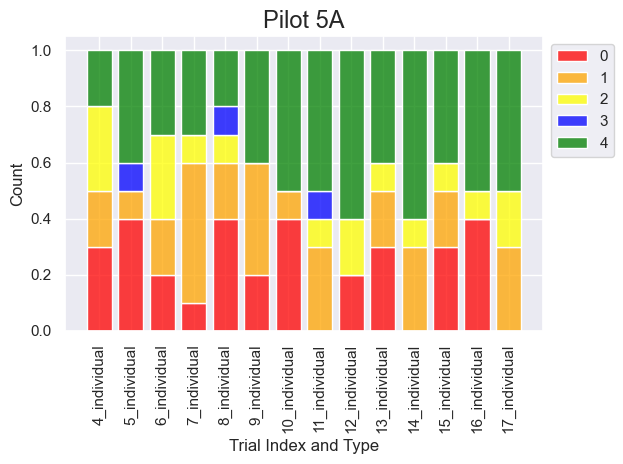

In [54]:
scores_dfA_human['plot_hue2'] = scores_dfA_human['trialIdx'].astype(int).astype(str) + '_' + scores_dfA_human['trialType']

scores_dfA_human['plot_hue2'] = pd.Categorical(scores_dfA_human['plot_hue2'], [f'{i}_individual' for i in range(4,18,1)])

a = scores_dfA_human.groupby(by=['plot_hue2'])['maxLevelReached'].value_counts(normalize=True).to_frame('prop').reset_index()
#plot_order = a.sort_values(by=['trialIdx'], ascending=False).plot_hue.values
g = sns.histplot(a, x='plot_hue2', hue='maxLevelReached',weights='prop',multiple='stack', hue_order=[4,3,2,1,0],
                 palette={0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'}, shrink=0.8,
                 legend=True)
plt.legend({0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'},bbox_to_anchor=(1, 1))
#g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels([f'{i}_individual' for i in range(4,18,1)],rotation=90)
g.set_title('Pilot 5A', fontsize=17)
g.set_xlabel('Trial Index and Type')
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'LevelReached_by_trialType_5A.png'), format='png', dpi=300)

In [55]:
scores_dfC_human

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score
345,649d986ad98de2a0b3c501b8,Human,rn-iii-pilot-5c,1,10.0,try_yourself_before,4eede304e151dc6c32f6cab0c086e55f,50.0,2.0,400.0,850.0
346,649d986ad98de2a0b3c501b8,Human,rn-iii-pilot-5c,1,12.0,try_yourself_after,4eede304e151dc6c32f6cab0c086e55f,400.0,0.0,400.0,850.0
347,649d986ad98de2a0b3c501b8,Human,rn-iii-pilot-5c,1,13.0,try_yourself_before,83561584e90d9418610d10c35f3e48db,550.0,1.0,800.0,1050.0
348,649d986ad98de2a0b3c501b8,Human,rn-iii-pilot-5c,1,15.0,try_yourself_after,83561584e90d9418610d10c35f3e48db,800.0,0.0,800.0,1050.0
349,649d986ad98de2a0b3c501b8,Human,rn-iii-pilot-5c,1,16.0,try_yourself_before,3fdaaa0ec51e3b2ac249febc76c6f3b0,1050.0,4.0,0.0,1050.0
...,...,...,...,...,...,...,...,...,...,...,...
490,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,23.0,individual_after,043e6946afedbdfe96a1b94b9c64bf63,650.0,4.0,300.0,1250.0
491,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,24.0,individual_after,e6bf4b808a028478dc72d88458701bae,-50.0,1.0,0.0,1650.0
492,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,25.0,individual_after,2eb7dea0d8ad18c567ab048a707597e1,1250.0,4.0,200.0,1250.0
493,649d986ad98de2a0b3c501c2,Human,rn-iii-pilot-5c,1,26.0,individual_after,c4b3f18b9ced69da6d451dfab4c4b966,1250.0,4.0,500.0,1650.0


/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_5109/946097143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dfC_human['plot_hue2'] = scores_dfC_human['trialIdx'].astype(int).astype(str) + '_' + scores_dfC_human['trialType']
/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_5109/946097143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dfC_human['plot_hue2'] = pd.Categorical(scores_dfC_human['plot_hue2'], [ '4_individual_before',
/var/folders/bf/1wzkxhv923145cbh3x

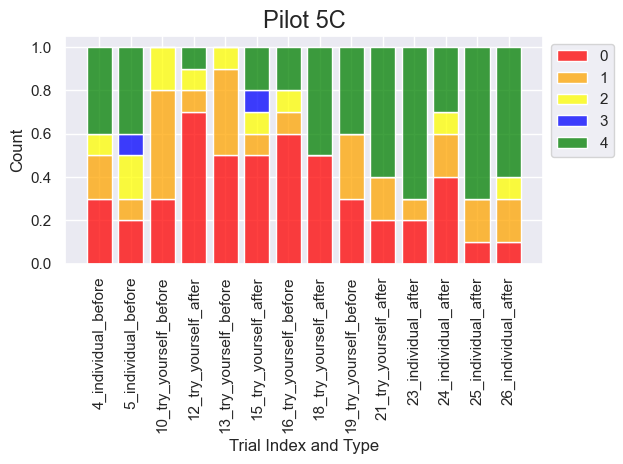

In [56]:
# rmeove nan trials
scores_dfC_human = scores_dfC_human[~scores_dfC_human['trialIdx'].isna()]

scores_dfC_human['plot_hue2'] = scores_dfC_human['trialIdx'].astype(int).astype(str) + '_' + scores_dfC_human['trialType']

scores_dfC_human['plot_hue2'] = pd.Categorical(scores_dfC_human['plot_hue2'], [ '4_individual_before',
 '5_individual_before','10_try_yourself_before',
 '12_try_yourself_after',
 '13_try_yourself_before',
 '15_try_yourself_after',
 '16_try_yourself_before',
 '18_try_yourself_after',
 '19_try_yourself_before',
 '21_try_yourself_after',
 '23_individual_after',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after'])

a = scores_dfC_human.groupby(by=['plot_hue2'])['maxLevelReached'].value_counts(normalize=True).to_frame('prop').reset_index()
#plot_order = a.sort_values(by=['trialIdx'], ascending=False).plot_hue.values
g = sns.histplot(a, x='plot_hue2', hue='maxLevelReached',weights='prop',multiple='stack', hue_order=[4,3,2,1,0],
                 palette={0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'}, shrink=0.8,
                 legend=True)
plt.legend({0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'},bbox_to_anchor=(1, 1))
#g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels([ '4_individual_before',
 '5_individual_before','10_try_yourself_before',
 '12_try_yourself_after',
 '13_try_yourself_before',
 '15_try_yourself_after',
 '16_try_yourself_before',
 '18_try_yourself_after',
 '19_try_yourself_before',
 '21_try_yourself_after',
 '23_individual_after',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after'],rotation=90)

g.set_title('Pilot 5C', fontsize=17)
g.set_xlabel('Trial Index and Type')
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'LevelReached_by_trialType_5C.png'), format='png', dpi=300)

In [57]:
scores_dfB_human

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score
90,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,10.0,try_yourself_before,949d93f06b9a159e993467fe9d6eec5a,400.0,1.0,500.0,1150.0
91,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,12.0,try_yourself_after,949d93f06b9a159e993467fe9d6eec5a,950.0,4.0,500.0,1150.0
92,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,13.0,try_yourself_before,13cca31d179666d20e50d055a4ecefb7,0.0,2.0,400.0,1250.0
93,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,15.0,try_yourself_after,13cca31d179666d20e50d055a4ecefb7,1450.0,4.0,400.0,1250.0
94,647731a58664fd383a5bfc19,Human,rn-iii-pilot-5b,1,16.0,try_yourself_before,05f42eade1468cc6abd87196683cc94b,1050.0,4.0,600.0,1250.0
...,...,...,...,...,...,...,...,...,...,...,...
250,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,23.0,individual_after,cb11a92337e321f67485a44764c1d9d7,1250.0,4.0,400.0,1050.0
251,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,24.0,individual_after,dcf8c0a56a196ab09598672bfe02e0de,1250.0,4.0,0.0,1050.0
252,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,25.0,individual_after,d97c38c9218b6edd11813f792278572f,1650.0,4.0,300.0,1650.0
253,64773d6f8664fd383a5bfc32,Human,rn-iii-pilot-5b,1,26.0,individual_after,8bc826881809ecd3ac951da2e6c8d01a,550.0,1.0,800.0,1250.0


/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_5109/1214266296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dfB_human['plot_hue2'] = scores_dfB_human['trialIdx'].astype(int).astype(str) + '_' + scores_dfB_human['trialType']
/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_5109/1214266296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dfB_human['plot_hue2'] = pd.Categorical(scores_dfB_human['plot_hue2'], [ '4_individual_before',
/var/folders/bf/1wzkxhv923145cbh

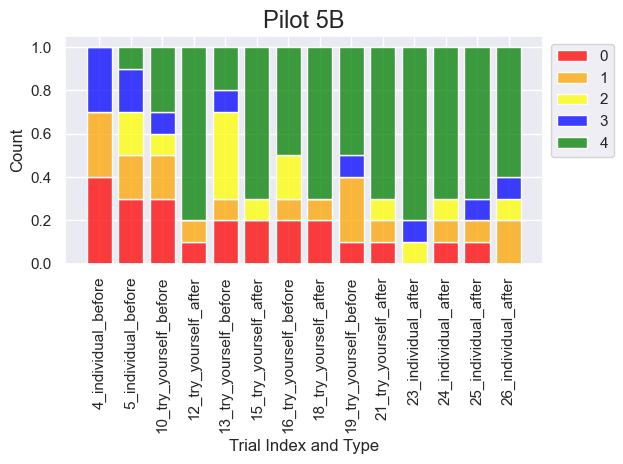

In [58]:
# rmeove nan trials
scores_dfB_human = scores_dfB_human[~scores_dfB_human['trialIdx'].isna()]

scores_dfB_human['plot_hue2'] = scores_dfB_human['trialIdx'].astype(int).astype(str) + '_' + scores_dfB_human['trialType']

scores_dfB_human['plot_hue2'] = pd.Categorical(scores_dfB_human['plot_hue2'], [ '4_individual_before',
 '5_individual_before','10_try_yourself_before',
 '12_try_yourself_after',
 '13_try_yourself_before',
 '15_try_yourself_after',
 '16_try_yourself_before',
 '18_try_yourself_after',
 '19_try_yourself_before',
 '21_try_yourself_after',
 '23_individual_after',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after'])

a = scores_dfB_human.groupby(by=['plot_hue2'])['maxLevelReached'].value_counts(normalize=True).to_frame('prop').reset_index()
#plot_order = a.sort_values(by=['trialIdx'], ascending=False).plot_hue.values
g = sns.histplot(a, x='plot_hue2', hue='maxLevelReached',weights='prop',multiple='stack', hue_order=[4,3,2,1,0],
                 palette={0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'}, shrink=0.8,
                 legend=True)
plt.legend({0:'red',
                           1:'orange',
                           2:'yellow',
                           3:'blue',
                           4:'green'},bbox_to_anchor=(1, 1))
#g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels([ '4_individual_before',
 '5_individual_before','10_try_yourself_before',
 '12_try_yourself_after',
 '13_try_yourself_before',
 '15_try_yourself_after',
 '16_try_yourself_before',
 '18_try_yourself_after',
 '19_try_yourself_before',
 '21_try_yourself_after',
 '23_individual_after',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after'],rotation=90)

g.set_title('Pilot 5B', fontsize=17)
g.set_xlabel('Trial Index and Type')
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'LevelReached_by_trialType_5B.png'), format='png', dpi=300)